#### 1.

In [ ]:
!pip install opencv-python matplotlib imageio gdown tensorflow

In [21]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [ ]:
tf.config.list_physical_devices('GPU')

[]

In [72]:

physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

In [71]:

import gdown

In [ ]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (original): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=6212758e-4dfe-4e8b-b431-9552d136d4c6
To: /content/data.zip
100%|██████████| 423M/423M [00:08<00:00, 49.8MB/s]


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [73]:
def load_video(path:str) -> List[float]:

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()

    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [70]:

vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [74]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [75]:
def load_alignments(path:str) -> List[str]:
    with open(path, 'r') as f:
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'),(-1)))[1:]

In [86]:
def load_data(path: str):
    path = bytes.decode(path.numpy())
    file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    #file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)

    return frames, alignments

In [77]:
test_path = '.\\data\\s1\\bbal6n.mpg'

In [78]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('\\')[-1].split('.')[0]

'bbal6n'

In [79]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

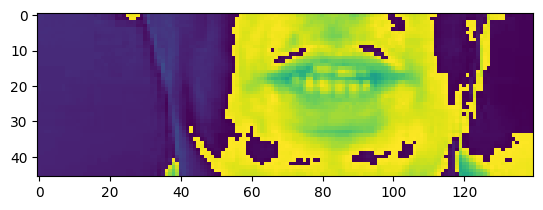

In [80]:
plt.imshow(frames[40])

In [81]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23])>

In [ ]:
print([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

['b', 'i', 'n', ' ', 'b', 'l', 'u', 'e', ' ', 'a', 't', ' ', 'l', ' ', 's', 'i', 'x', ' ', 'n', 'o', 'w']


In [ ]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [66]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

#### Creating Data Pipeline

In [ ]:

from matplotlib import pyplot as plt

In [92]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split
train = data.take(450)
test = data.skip(450)

In [93]:
data.as_numpy_iterator().next()

(array([[[[[1.3236978 ],
           [1.3236978 ],
           [1.3236978 ],
           ...,
           [0.3114583 ],
           [0.38932288],
           [0.35039058]],
 
          [[1.3236978 ],
           [1.3236978 ],
           [1.3236978 ],
           ...,
           [0.27252603],
           [0.38932288],
           [0.35039058]],
 
          [[1.2847655 ],
           [1.2847655 ],
           [1.2847655 ],
           ...,
           [0.23359373],
           [0.23359373],
           [0.23359373]],
 
          ...,
 
          [[0.9343749 ],
           [0.9343749 ],
           [0.9343749 ],
           ...,
           [0.5839843 ],
           [0.42825517],
           [0.6229166 ]],
 
          [[0.8954426 ],
           [0.8954426 ],
           [0.8954426 ],
           ...,
           [0.54505205],
           [0.5061197 ],
           [0.5839843 ]],
 
          [[0.8954426 ],
           [0.8954426 ],
           [0.8954426 ],
           ...,
           [0.5061197 ],
           [0.5839843 

In [94]:
len(test)


50

In [95]:
len(frames)

75

In [96]:
sample = data.as_numpy_iterator()

In [97]:
frames, alignments = data.as_numpy_iterator().next()

In [98]:

val = sample.next(); val[0]

array([[[[[1.5143619 ],
          [1.5143619 ],
          [1.550418  ],
          ...,
          [0.28844988],
          [0.25239363],
          [0.25239363]],

         [[1.5143619 ],
          [1.5143619 ],
          [1.550418  ],
          ...,
          [0.28844988],
          [0.25239363],
          [0.25239363]],

         [[1.5143619 ],
          [1.5143619 ],
          [1.4783056 ],
          ...,
          [0.25239363],
          [0.25239363],
          [0.25239363]],

         ...,

         [[1.0095745 ],
          [1.0095745 ],
          [1.0095745 ],
          ...,
          [9.19434   ],
          [9.19434   ],
          [9.19434   ]],

         [[1.0095745 ],
          [1.0095745 ],
          [1.0095745 ],
          ...,
          [9.158283  ],
          [9.158283  ],
          [9.158283  ]],

         [[1.0095745 ],
          [1.0095745 ],
          [1.0095745 ],
          ...,
          [9.158283  ],
          [9.158283  ],
          [9.158283  ]]],


        [[[1.5143

In [101]:
# Ensure val[0][1] is the correct array of video frames
print(f"Shape of val[0]: {val[0].shape}")
print(f"Shape of val[0][1]: {val[0][1].shape}")
print(f"Data type of val[0][1]: {val[0][1].dtype}")


Shape of val[0]: (2, 75, 46, 140, 1)
Shape of val[0][1]: (75, 46, 140, 1)
Data type of val[0][1]: float32


In [102]:
# Normalize and convert to uint8 if needed
if val[0][1].dtype == np.float32 or val[0][1].dtype == np.float64:
    images = (255 * val[0][1]).astype(np.uint8)
else:
    images = val[0][1].astype(np.uint8)

In [104]:
#imageio.mimsave('./animation.gif', val[0][0], fps=10)

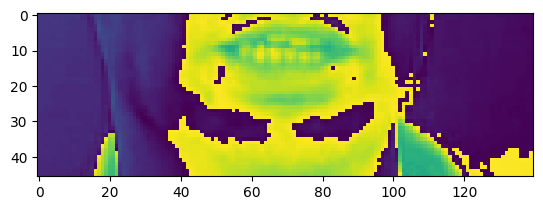

In [99]:
plt.imshow(val[0][0][35])

In [105]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'set red by u nine again'>

#### Desing Deep Nueral Network

In [124]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [107]:
data.as_numpy_iterator().next()[0][0].shape


(75, 46, 140, 1)

In [126]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [109]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128   3584      
                             )                                   
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128   0         
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 75, 23, 70, 128)   0         
 D)                                                              
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                        

In [110]:
yhat = model.predict(val[0])


1/1 [==============================] - 15s 15s/step


In [111]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'mmmmmmmmmmmmmmmmmmmmmmmmmmmm77777777lllllllmmmmmmmmmm7nnn'>

In [112]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'mmmmmmmmmmmmmmmmmmmmmmmmmmmm77777777lllllllmmmmmmmmmm7nnn'>

In [113]:
model.input_shape

(None, 75, 46, 140, 1)

In [114]:
model.output_shape

(None, 75, 41)

#### Setup Training Options and Train

In [115]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [116]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [117]:
class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self, dataset) -> None:
        self.dataset = dataset.as_numpy_iterator()

    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [138]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)


In [119]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True)


In [120]:
schedule_callback = LearningRateScheduler(scheduler)

In [121]:
example_callback = ProduceExample(test)

In [139]:
model.fit(train, validation_data=test, epochs=100, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/100


KeyboardInterrupt: 

#### Making Predictions

In [122]:
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

Downloading...
From (original): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y
From (redirected): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y&confirm=t&uuid=36195b75-92a0-42c6-ae47-0eda18fff625
To: /content/checkpoints.zip
100%|██████████| 94.5M/94.5M [00:02<00:00, 43.9MB/s]


['models/checkpoint.index',
 'models/__MACOSX/._checkpoint.index',
 'models/checkpoint.data-00000-of-00001',
 'models/__MACOSX/._checkpoint.data-00000-of-00001',
 'models/checkpoint',
 'models/__MACOSX/._checkpoint']

In [127]:

model.load_weights('models/checkpoint')

In [128]:
test_data = test.as_numpy_iterator()

In [129]:
sample = test_data.next()

In [130]:
yhat = model.predict(sample[0])

1/1 [==============================] - 15s 15s/step


In [131]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'set blue at t eight please'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'bin red at f eight now'>]

In [132]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [133]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'set blue at t eight please'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'bin red at f eight now'>]